In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load single file from thredds 
# base url
base_url = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/Argo/aggregated_datasets/'

# Select region
#region = "atlantic/"
#region = "indian_ocean/"
#region = "north_pacific/"
region = "south_pacific/"

#file/s selection
file = 'IMOS_Argo_TPS-20000101T000000_FV01_yearly-aggregation-South_Pacific_C-20130501T180000Z.nc'

nc = xr.open_dataset(base_url+region+file)

In [14]:
# Have a look at the file content
nc

<xarray.Dataset>
Dimensions:               (N_PROF: 121, N_LEVELS: 71)
Dimensions without coordinates: N_PROF, N_LEVELS
Data variables: (12/22)
    TEMP_ADJUSTED         (N_PROF, N_LEVELS) float32 ...
    PSAL_ADJUSTED         (N_PROF, N_LEVELS) float32 ...
    PRES_ADJUSTED         (N_PROF, N_LEVELS) float32 ...
    TEMP_ADJUSTED_QC      (N_PROF, N_LEVELS) float64 ...
    PSAL_ADJUSTED_QC      (N_PROF, N_LEVELS) float64 ...
    PRES_ADJUSTED_QC      (N_PROF, N_LEVELS) float64 ...
    ...                    ...
    HANDBOOK_VERSION      (N_PROF) object ...
    INST_REFERENCE        (N_PROF) object ...
    JULD                  (N_PROF) datetime64[ns] ...
    DATE_CREATION         (N_PROF) datetime64[ns] ...
    DATE_UPDATE           (N_PROF) datetime64[ns] ...
    DATA_MODE             object ...
Attributes:
    description:   Argo aggregation file - normal vertical sampling density (...
    author:        Jeff Dunn
    date:          01-May-2013 18:12:55
    history:       Created by aggregate_argo.m on 01-May-2013
    url:           http://www.cmar.csiro.au/argo/
    comment:       Quality flags and Error estimates should be taken into acc...
    DODS.strlen:   121
    DODS.dimName:  N_PROF

In [15]:
#check dimensions
nc.TEMP_ADJUSTED.dims

('N_PROF', 'N_LEVELS')

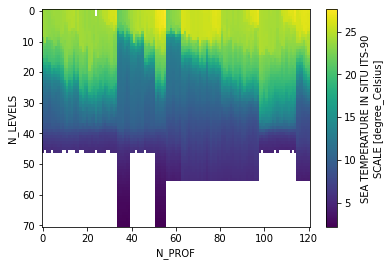

In [16]:
# Quick look at Temperature Profiles (time) 
#N_LEVELS(depth) AND N_PROOF (time)
nc.TEMP_ADJUSTED.T.plot()
plt.gca().invert_yaxis()

In [17]:
#Select good Argo dive
N_PROOF = 38 

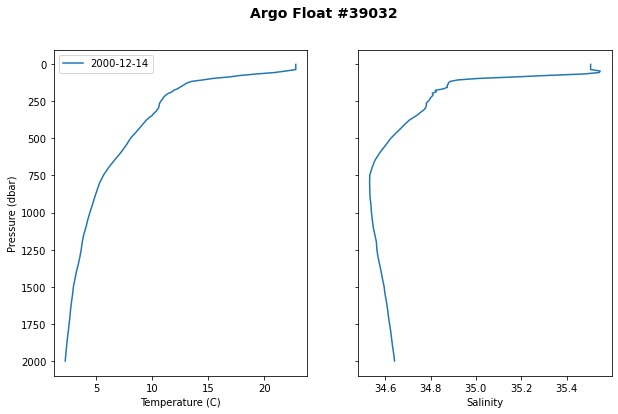

In [18]:
# Temperature and Salinity plot example
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.plot(nc.TEMP_ADJUSTED[N_PROOF], nc.PRES_ADJUSTED[N_PROOF], label=nc.JULD[N_PROOF].dt.strftime('%Y-%m-%d').values)
ax2.plot(nc.PSAL_ADJUSTED[N_PROOF], nc.PRES_ADJUSTED[N_PROOF])

# Add axes names
ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (C)')
ax2.set_xlabel('Salinity')
ax1.invert_yaxis()
ax1.legend()
# Add plot title
fig.suptitle('Argo Float #%d' % nc.PLATFORM_NUMBER[N_PROOF].values, fontweight='bold', fontsize=14);


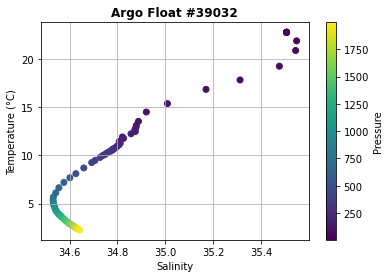

In [19]:
# Temperature/Salinity plot with depth (pressure)
plt.scatter(nc.PSAL_ADJUSTED[N_PROOF], nc.TEMP_ADJUSTED[N_PROOF], c=nc.PRES_ADJUSTED[N_PROOF])
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()

cbh = plt.colorbar();
cbh.set_label('Pressure')

# Add plot title
plt.title('Argo Float #%d' % nc.PLATFORM_NUMBER[N_PROOF].values, fontweight='bold');